# Project Title

Global Freelancers

# Domain
I am using Global Freelancers datasets having 12 columns of Data.

# Objective

1. To identify meaningful patterns, trends, and insights from the dataset using exploratory data analysis (EDA)

2. To clean, transform, and preprocess the data for analysis

3. To create meaningful visualizations that clearly explain the story behind the data

4. To provide actionable insights and recommendations from the analysis

# Outcome

The project helps uncover key patterns, trends, and hidden insights from the dataset. The analysis provides a clear understanding of the data and supports decision-making with evidence-based findings.

#Dataset Information

Source: UCI ML Repository / Kaggle / Government Portals / Company Internal Dataset / Open Data Portals

Year / Timeline: Data collected during YYYY to YYYY

Dataset Description:

Name - It tells us about the names of the bank customers

This dataset contains 1,000 fictional freelancer profiles from around the world, designed to reflect realistic variability and messiness often encountered in real-world data collection

Each entry includes demographic, professional, and platform-related information such as:
1.Name, gender, age, and country
2.Primary skill and years of experience
3.Hourly rate (with mixed formatting), client rating, and satisfaction score
4.Language spoken (based on country)
5.Inconsistent and unclean values across several fields (e.g., gender, is_active, satisfaction)

| Column Name           | Description                                                              |
| --------------------- | ------------------------------------------------------------------------ |
| `freelancer_ID`       | Unique ID starting with `FL` (e.g., FL250001)                            |
| `name`                | Full name of freelancer (based on gender)                                |
| `gender`              | Gender (messy values and case inconsistency)                             |
| `age`                 | Age of the freelancer (20–60, with occasional nulls/outliers)            |
| `country`             | Country name (with random formatting/casing)                             |
| `language`            | Language spoken (mapped from country)                                    |
| `primary_skill`       | Key freelance domain (e.g., Web Dev, AI, Cybersecurity)                  |
| `years_of_experience` | Work experience in years (some missing values or odd values included)    |
| `hourly_rate (USD)`   | Hourly rate with currency symbols or missing data                        |
| `rating`              | Rating between 1.0–5.0 (some zeros and nulls included)                   |
| `is_active`           | Active status (inconsistently represented as strings, numbers, booleans) |
| `client_satisfaction` | Satisfaction percentage (e.g., "85%" or 85, may include NaNs)            |


#Type of Analysis

Descriptive Analysis (summarizing the dataset)

Diagnostic Analysis (finding reasons behind patterns)

Predictive Analysis (optional if forecasting required using basic stats)

Prescriptive Analysis (recommendations for business decisions)

# Stages for DA Project

## Stage 1 – Problem Definition and Dataset Selection

Define the business problem and expected outcome


Choose dataset and explain its source, size, and features

Import libraries, load dataset

Dataset description (rows, columns, features)

Initial EDA (head, info, describe, shape, null checks, duplicate check)

#Business Problem:
Global freelancers dataset to find the optimizing a freelance platform's strategy to attract and retain talent.

It is very efficent to start a new company like freelancing or consulting company to improve their services using this analysis in efficent way.

#Outcome:
According to Platform company they might get Improved Market Competitiveness,Enhanced Pricing Strategy. Insifghts for Freelancers Better Income Opportunities for Freelancers,Clearer Path to Success for Freelancers.



In [1]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#installing Kaggle Library
!pip install -q kaggle

# Loading the dataset
# Uploading Kaggle API key (kaggle.json)
from google.colab import files
print("Upload kaggle.json file")
files.upload()


Upload kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"divyadharsanu","key":"d3f49da1b93aa40d706d949262b52d96"}'}

In [3]:
# Configure Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print("Kaggle API key configured successfully")

Kaggle API key configured successfully


In [4]:
# Download the dataset using the correct API command
# The username 'Urvish Ahir' contains a space. The correct ID is simply 'urvishahir'.
!kaggle datasets download -d urvishahir/global-freelancers-raw-dataset

Dataset URL: https://www.kaggle.com/datasets/urvishahir/global-freelancers-raw-dataset
License(s): CC0-1.0
  0% 0.00/22.1k [00:00<?, ?B/s]
100% 22.1k/22.1k [00:00<00:00, 69.7MB/s]


In [5]:
#Unzip the downloaded file
!unzip global-freelancers-raw-dataset.zip

Archive:  global-freelancers-raw-dataset.zip
  inflating: global_freelancers_raw.csv  


In [6]:
#Read the dataset into a pandas DataFrame
df = pd.read_csv('global_freelancers_raw.csv')


In [7]:
# Number of rows and columns
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 1000
Number of columns: 12


In [8]:
# Column names
print("\nColumns (features):")
print(df.columns)


Columns (features):
Index(['freelancer_ID', 'name', 'gender', 'age', 'country', 'language',
       'primary_skill', 'years_of_experience', 'hourly_rate (USD)', 'rating',
       'is_active', 'client_satisfaction'],
      dtype='object')


#Intial EDA Checks

In [9]:
df.head()

,freelancer_ID,name,gender,age,country,language,primary_skill,years_of_experience,hourly_rate (USD),rating,is_active,client_satisfaction
0,FL250001,Ms. Nicole Kidd,f,52.0,Italy,Italian,Blockchain Development,11.0,100,NaN,0,NaN
1,FL250002,Vanessa Garcia,FEMALE,52.0,Australia,English,Mobile Apps,34.0,USD 100,3.3,1,84%
2,FL250003,Juan Nelson,male,53.0,Germany,German,Graphic Design,31.0,50,0.0,N,71%
3,FL250004,Amanda Spencer,F,38.0,Australia,English,Web Development,4.0,$40,1.5,N,90%
4,FL250005,Lynn Curtis DDS,female,53.0,Germany,German,Web Development,27.0,30,4.8,0,83%


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   freelancer_ID        1000 non-null   object 
 1   name                 1000 non-null   object 
 2   gender               1000 non-null   object 
 3   age                  970 non-null    float64
 4   country              1000 non-null   object 
 5   language             1000 non-null   object 
 6   primary_skill        1000 non-null   object 
 7   years_of_experience  949 non-null    float64
 8   hourly_rate (USD)    906 non-null    object 
 9   rating               899 non-null    float64
 10  is_active            911 non-null    object 
 11  client_satisfaction  824 non-null    object 
dtypes: float64(3), object(9)
memory usage: 93.9+ KB


In [11]:
df.describe()

,age,years_of_experience,rating
count,970.000000,949.000000,899.000000
mean,40.509278,11.340358,2.512570
std,11.942605,9.680610,1.546599
min,20.000000,0.000000,0.000000
25%,31.000000,3.000000,1.400000
50%,41.000000,9.000000,2.600000
75%,51.000000,17.000000,3.800000
max,60.000000,41.000000,5.000000


In [12]:
print(df.shape)

(1000, 12)


In [13]:
print("Null values in dataset:\n",df.isnull().sum())


Null values in dataset:
 freelancer_ID            0
name                     0
gender                   0
age                     30
country                  0
language                 0
primary_skill            0
years_of_experience     51
hourly_rate (USD)       94
rating                 101
is_active               89
client_satisfaction    176
dtype: int64


In [14]:
print("Total duplicate values:",df.duplicated().sum())

Total duplicate values: 0


## Stage 2 – Data Cleaning and Pre-processing

Handle missing values (impute or drop)

Handle duplicates

Treat outliers if required

Check skewness and apply transformations

Convert data types if needed

Feature transformations (date parts, derived fields if required for analysis)

In [15]:
## Handling missing values age column
## find average value of age
df['age'].mean()

np.float64(40.509278350515466)

In [16]:
age_mean=df['age'].mean()
print(age_mean)

40.509278350515466


In [17]:
df['age'] = df['age'].fillna(age_mean)

In [18]:
print(df.head(100))

   freelancer_ID               name  gender        age        country  \
0       FL250001    Ms. Nicole Kidd       f  52.000000          Italy   
1       FL250002     Vanessa Garcia  FEMALE  52.000000      Australia   
2       FL250003        Juan Nelson    male  53.000000        Germany   
3       FL250004     Amanda Spencer       F  38.000000      Australia   
4       FL250005    Lynn Curtis DDS  female  53.000000        Germany   
..           ...                ...     ...        ...            ...   
95      FL250096     Shelby Mcmahon  FEMALE  36.000000          Italy   
96      FL250097     Bethany Wright       f  49.000000          Spain   
97      FL250098        David Ortiz    Male  37.000000  United States   
98      FL250099       Andrew Lynch    MALE  40.509278  United States   
99      FL250100  Kristopher Meyers       m  32.000000          Egypt   

   language           primary_skill  years_of_experience hourly_rate (USD)  \
0   Italian  Blockchain Development          

In [19]:
print(df)

    freelancer_ID             name  gender   age    country  language  \
0        FL250001  Ms. Nicole Kidd       f  52.0      Italy   Italian   
1        FL250002   Vanessa Garcia  FEMALE  52.0  Australia   English   
2        FL250003      Juan Nelson    male  53.0    Germany    German   
3        FL250004   Amanda Spencer       F  38.0  Australia   English   
4        FL250005  Lynn Curtis DDS  female  53.0    Germany    German   
..            ...              ...     ...   ...        ...       ...   
995      FL250996    Albert Wilcox    Male  56.0     Turkey   Turkish   
996      FL250997    Cheryl Norris       f  26.0    Germany    German   
997      FL250998    Kathy Watkins  female  37.0      Japan  Japanese   
998      FL250999      John Obrien       m  46.0     Russia   Russian   
999      FL251000       Dawn Green  Female  36.0     Mexico   Spanish   

              primary_skill  years_of_experience hourly_rate (USD)  rating  \
0    Blockchain Development                 1

In [20]:
# Handling missing values year of experience column
df['years_of_experience'].mean()


np.float64(11.34035827186512)

In [21]:
years_of_experience_mean = df['years_of_experience'].mean()

In [22]:
df['years_of_experience'] = df['years_of_experience'].fillna(years_of_experience_mean)

In [23]:
##Year_of_experience first imputed value in Data Frame
print(df.iloc[17,7])

11.34035827186512


In [24]:
print(df.iloc[:,8])

0          100
1      USD 100
2           50
3          $40
4           30
        ...   
995        100
996     USD 40
997         75
998        100
999        $20
Name: hourly_rate (USD), Length: 1000, dtype: object


In [25]:
#### Handling missing values "hourly_rate (USD)""  column
## Formatting the column into correct format
df['hourly_rate (USD)'] = df['hourly_rate (USD)'].astype(str)
df['hourly_rate (USD)'] = df['hourly_rate (USD)'].str.replace(r'[^\d.]', '', regex=True)
df['hourly_rate (USD)'] = df['hourly_rate (USD)'].replace('', np.nan)


In [26]:
df['hourly_rate (USD)'] = df['hourly_rate (USD)'].astype(float)

In [27]:
hourly_rate_mean=df['hourly_rate (USD)'].mean()

In [28]:
df['hourly_rate (USD)'] = df['hourly_rate (USD)'].fillna(hourly_rate_mean)

In [29]:
print(df.iloc[:,8])

0      100.0
1      100.0
2       50.0
3       40.0
4       30.0
       ...  
995    100.0
996     40.0
997     75.0
998    100.0
999     20.0
Name: hourly_rate (USD), Length: 1000, dtype: float64


In [30]:
##fixed and formatting and imputed null values in Gender column.
mapping_dict = {
    'FEMALE': 'Female',
    'female': 'Female',
    'F': 'Female',
    'male': 'Male',
    'MALE': 'Male',
    'M': 'Male'
}
df['gender']= df['gender'].map(mapping_dict)

In [31]:
df['gender'] = df['gender'].fillna("Unknown")

In [32]:
print (df.iloc[:,2])

0      Unknown
1       Female
2         Male
3       Female
4       Female
        ...   
995    Unknown
996    Unknown
997     Female
998    Unknown
999    Unknown
Name: gender, Length: 1000, dtype: object


In [33]:
#### Handling missing values "Rating"  column
rating_mean=df["rating"].mean()
rating_mean

np.float64(2.5125695216907675)

In [34]:
df["rating"]=df["rating"].fillna(rating_mean)

In [35]:
print (df.iloc[:,9])

0      2.51257
1      3.30000
2      0.00000
3      1.50000
4      4.80000
        ...   
995    0.00000
996    2.80000
997    2.51257
998    2.80000
999    1.70000
Name: rating, Length: 1000, dtype: float64


In [36]:
mapping_dict = {
    '0': 'No',
    '1': 'Yes',
    'True': 'Yes',
    'False': 'No',
    'N': 'No',
    'Y': 'Yes',
    'yes':'Yes',
    'no':'No'
}
df['is_active']= df['is_active'].map(mapping_dict)

In [37]:
# Handling missing values "Is Active"  column
df['is_active'] = df['is_active'].fillna("Unknown")

In [38]:
print (df.iloc[:,10])

0       No
1      Yes
2       No
3       No
4       No
      ... 
995     No
996     No
997     No
998    Yes
999    Yes
Name: is_active, Length: 1000, dtype: object


In [39]:
## Handling incorrect values in Client Satisfaction.
def clean_and_convert(value):
   if pd.isna(value) or value == 'NaN':
        return np.nan
   try:
        # Remove '%' sign if present and convert to float
        if isinstance(value, str) and '%' in value:
            return float(value.replace('%', ''))
        else:
            return float(value)
   except ValueError:
        # Handle any other potential conversion errors by returning NaN
        return np.nan
df['client_satisfaction']= df['client_satisfaction'].apply(clean_and_convert)

In [40]:
df['client_satisfaction'] = df['client_satisfaction'].fillna('Unknown')

In [41]:
df['client_satisfaction'] = df['client_satisfaction'].replace('Unknown', 0)

/tmp/ipython-input-3188880963.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['client_satisfaction'] = df['client_satisfaction'].replace('Unknown', 0)


In [42]:
df['client_satisfaction'] = df['client_satisfaction'].astype(float)

In [43]:
Client_Satisfaction_mean= df['client_satisfaction'].mean()
Client_Satisfaction_mean

np.float64(65.318)

In [44]:
df['client_satisfaction'] = df['client_satisfaction'].replace(0.0, Client_Satisfaction_mean)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   freelancer_ID        1000 non-null   object 
 1   name                 1000 non-null   object 
 2   gender               1000 non-null   object 
 3   age                  1000 non-null   float64
 4   country              1000 non-null   object 
 5   language             1000 non-null   object 
 6   primary_skill        1000 non-null   object 
 7   years_of_experience  1000 non-null   float64
 8   hourly_rate (USD)    1000 non-null   float64
 9   rating               1000 non-null   float64
 10  is_active            1000 non-null   object 
 11  client_satisfaction  1000 non-null   float64
dtypes: float64(5), object(7)
memory usage: 93.9+ KB


In [46]:
print(df)

    freelancer_ID             name   gender   age    country  language  \
0        FL250001  Ms. Nicole Kidd  Unknown  52.0      Italy   Italian   
1        FL250002   Vanessa Garcia   Female  52.0  Australia   English   
2        FL250003      Juan Nelson     Male  53.0    Germany    German   
3        FL250004   Amanda Spencer   Female  38.0  Australia   English   
4        FL250005  Lynn Curtis DDS   Female  53.0    Germany    German   
..            ...              ...      ...   ...        ...       ...   
995      FL250996    Albert Wilcox  Unknown  56.0     Turkey   Turkish   
996      FL250997    Cheryl Norris  Unknown  26.0    Germany    German   
997      FL250998    Kathy Watkins   Female  37.0      Japan  Japanese   
998      FL250999      John Obrien  Unknown  46.0     Russia   Russian   
999      FL251000       Dawn Green  Unknown  36.0     Mexico   Spanish   

              primary_skill  years_of_experience  hourly_rate (USD)   rating  \
0    Blockchain Development    

In [47]:
print("Null values in dataset:\n",df.isnull().sum())

Null values in dataset:
 freelancer_ID          0
name                   0
gender                 0
age                    0
country                0
language               0
primary_skill          0
years_of_experience    0
hourly_rate (USD)      0
rating                 0
is_active              0
client_satisfaction    0
dtype: int64


## Stage 3 – EDA and Visualizations

Univariate Analysis → distribution of single variables (countplot, histogram, boxplot)

Bivariate Analysis → relation between two variables (scatterplot, barplot, correlation heatmap)

Multivariate Analysis → relation among 3+ variables (pairplot, grouped analysis, pivot tables, advanced plots)

Interpretation MUST with every visualization

Focus on business story not just charts

Each chart must be in seperate cells.

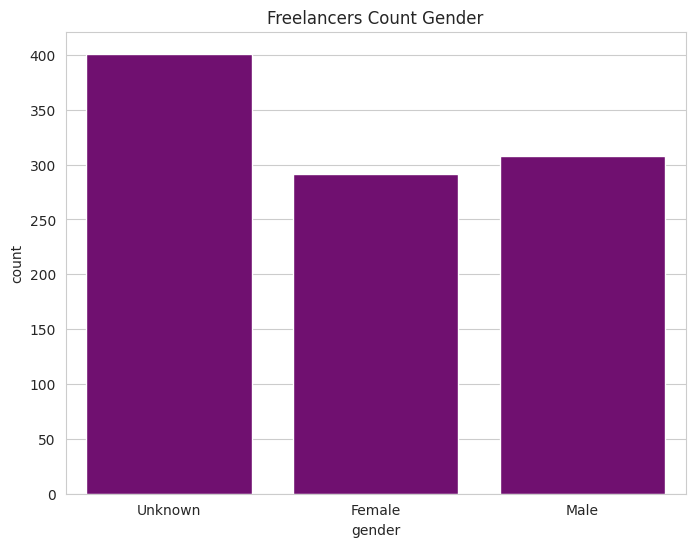

In [48]:
# your chart here
# If you want more cells, you can add or less cells you can remove, but dont change the structure.
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='gender',data=df,color='purple')
plt.title('Freelancers Count Gender')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

## Interpretation of your above chart

Explain the Chart:  using CountPlot chart to showcase the number of employee in Gender wise.

What is it saying?
This Chart stated the distribution of Freelancers according to the Gender

What features you used?
The features I am using in this whitegrid background and using Seaborn for chart and Matplot for and its other features.

From this what you are showing us?
According to this chart showing amount of employees in Gender wise, which Gender is maximum freelancers employee. Moreover, the customer wants to select the freelancer to Gender wise.

In [49]:
df['age'] = df['age'].astype(int)


In [50]:
# your code here
# If you want more cells, you can add or less cells you can remove, but dont change the structure.\
conditions=[(df['age']>20)&(df['age']<=30),
            (df['age']>30)&(df['age']<=40),
            (df['age']>40)&(df['age']<=50),]
categories=['Fresh Bloods','Senior Bloods','Professional Bloods',]
df['age_category']=np.select(conditions,categories,default='old Bloods')

In [51]:
print(df)

    freelancer_ID             name   gender  age    country  language  \
0        FL250001  Ms. Nicole Kidd  Unknown   52      Italy   Italian   
1        FL250002   Vanessa Garcia   Female   52  Australia   English   
2        FL250003      Juan Nelson     Male   53    Germany    German   
3        FL250004   Amanda Spencer   Female   38  Australia   English   
4        FL250005  Lynn Curtis DDS   Female   53    Germany    German   
..            ...              ...      ...  ...        ...       ...   
995      FL250996    Albert Wilcox  Unknown   56     Turkey   Turkish   
996      FL250997    Cheryl Norris  Unknown   26    Germany    German   
997      FL250998    Kathy Watkins   Female   37      Japan  Japanese   
998      FL250999      John Obrien  Unknown   46     Russia   Russian   
999      FL251000       Dawn Green  Unknown   36     Mexico   Spanish   

              primary_skill  years_of_experience  hourly_rate (USD)   rating  \
0    Blockchain Development                

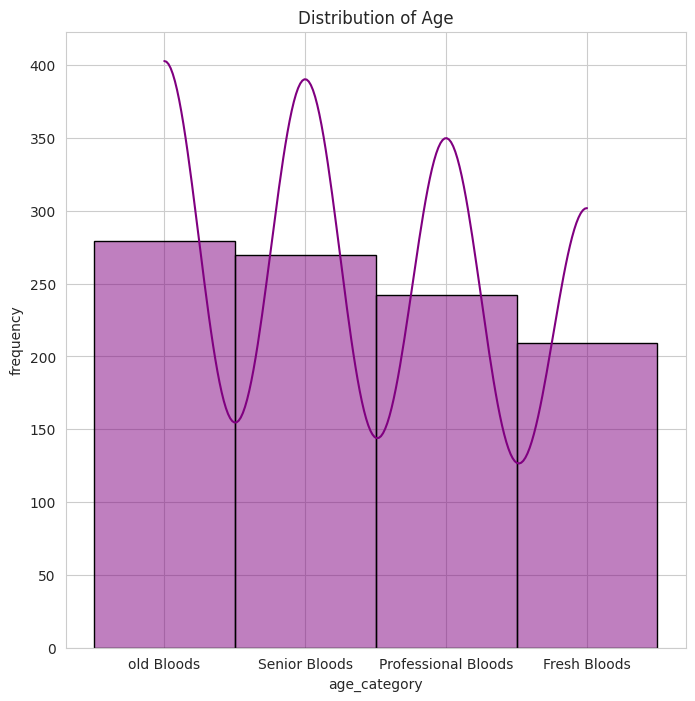

In [52]:
plt.figure(figsize=(8,8))
sns.histplot(df['age_category'],bins=60,color='Purple',edgecolor='black',kde=True)
plt.xlabel('age_category')
plt.ylabel('frequency')
plt.title('Distribution of Age')
plt.show()

## Interpretation of your above chart
Histogram Chart:
I evolved age column into categorized column to make easier to find the Freelancers age. Senior bloods=  between 30 to 40, fresh bloods = 20 to 30, professional bloods = 40 to 50, old bloods = above 50. In this chart can see the count of age wise free lancers along with Categorized.

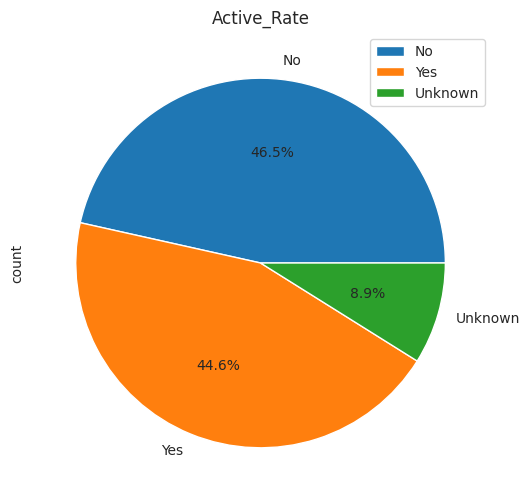

In [53]:
plt.figure(figsize=(6,6))
df['is_active'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Active_Rate")
plt.legend()
plt.show()

Pie Chart:
According to this I can showcase the no of percentage active status of freelancers employers.

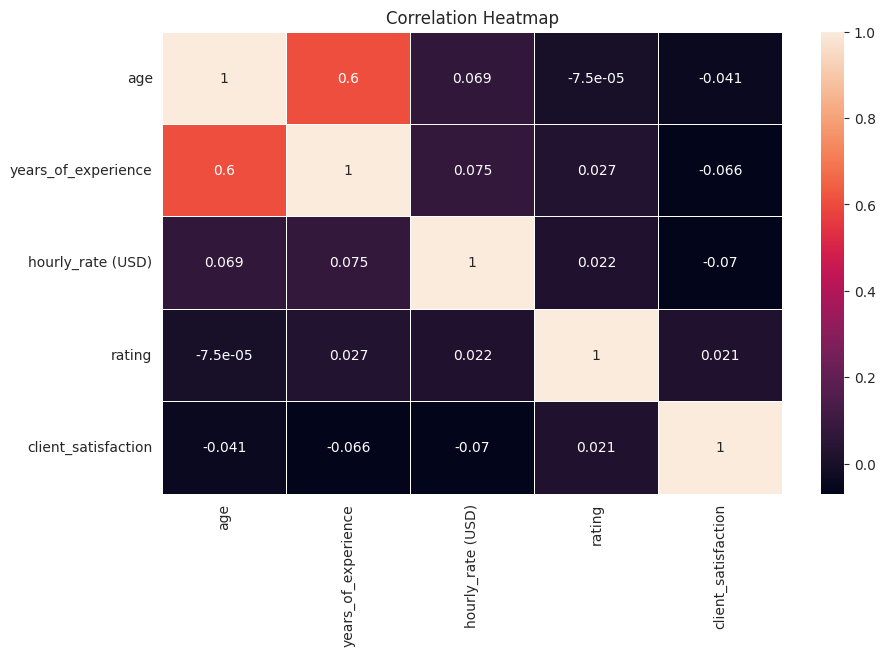

In [54]:
numeric_cols = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Heat Meat:
Positive Correlation: The strongest positive correlation is between age and years of experience (0.6). This suggests that as age increases, years of experience also tend to increase.

Weak Positive Correlations:
There is a very weak positive correlation (around 0.07) between years of experience and hourly rate (USD), and a similarly weak one between age and hourly rate.
All other positive correlations (e.g., rating and client satisfaction, 0.021) are extremely weak, close to zero.

Weak Negative Correlations: All negative correlations are weak, close to zero (e.g., age and client satisfaction, -0.041), indicating virtually no linear relationship.

Perfect Correlation: The diagonal line shows a perfect positive correlation (1) because each variable is correlated with itself.


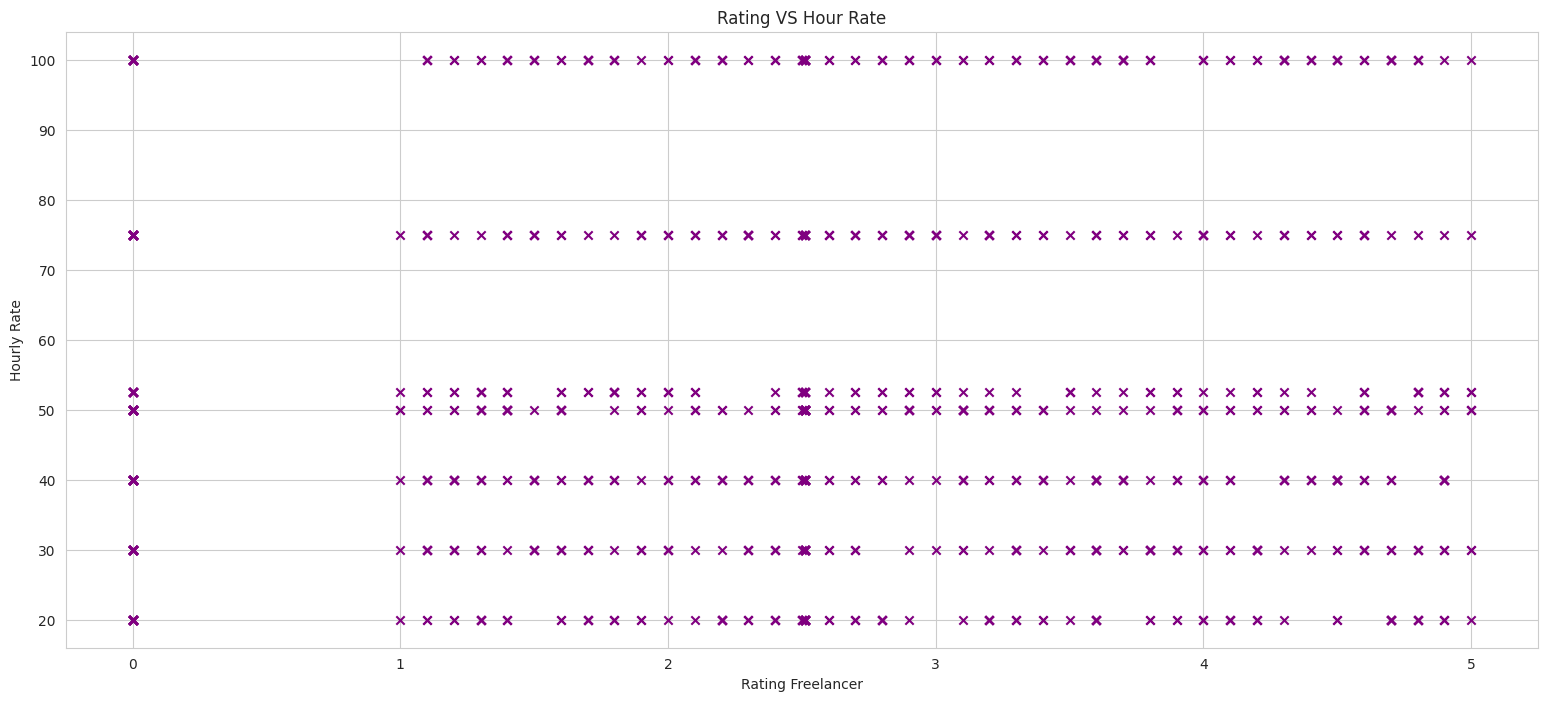

In [55]:
rating=df['rating']
hourly_rate=df['hourly_rate (USD)']
plt.figure(figsize=(19, 8))
plt.scatter(rating,hourly_rate,marker='x', linestyle='-', color='Purple') # Adds markers and sets line style/color
plt.title("Rating VS Hour Rate") # Add a title
plt.xlabel("Rating Freelancer") # Label for the x-axis
plt.ylabel("Hourly Rate") # Label for the y-axis
plt.grid(True) # Adds a grid for better readability
plt.show() # Displa

Scatter Chart:
"This chart illustrates the relationship between a freelancer's rating and their hourly rate. An initial observation reveals that even freelancers with a '0' rating can command a high maximum hourly rate. Based on this, a strategy emerges: it may be advisable to filter out or avoid engaging freelancers who have minimum ratings but are demanding maximum hourly rates for their work."

/tmp/ipython-input-525131960.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


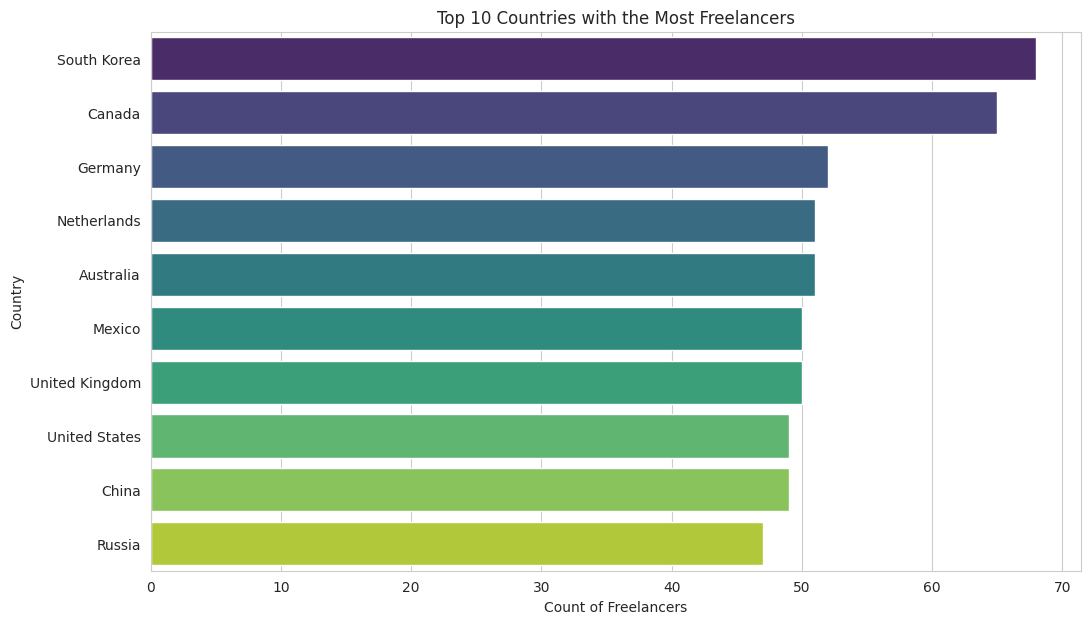

In [56]:
#Top 10 Countries by Number of Freelancers ---

# Count occurrences of each country and get the top 10
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(12, 7))

# Create a horizontal bar plot
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')

plt.title('Top 10 Countries with the Most Freelancers')
plt.xlabel('Count of Freelancers')
plt.ylabel('Country')
plt.show()


Bar Plot:
This chart displays the top 10 countries with the highest concentration of locally available freelancers. This information allows clients to select workers based on proximity and comfort with a local talent pool, potentially facilitating easier communication and project management due to shared time zones or cultural familiarity.

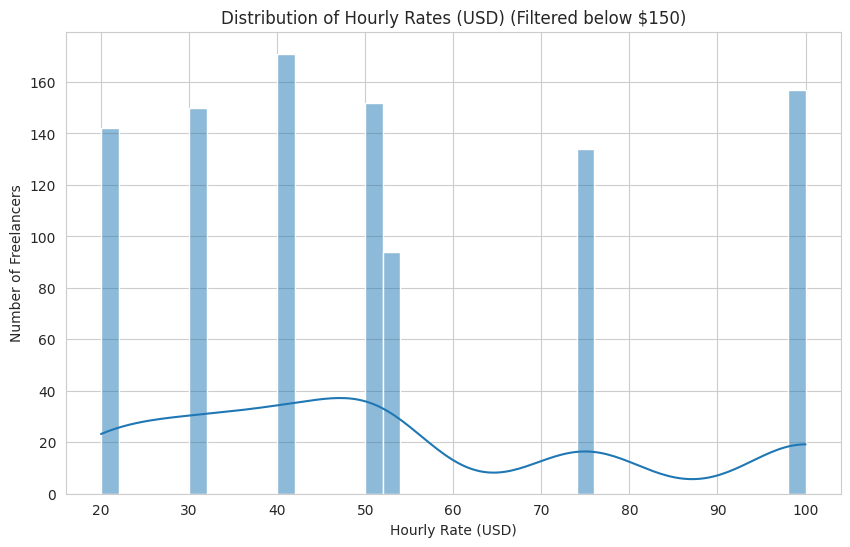

In [57]:
#Distribution of Hourly Rates ---

plt.figure(figsize=(10, 6))

# Plot a histogram with a Kernel Density Estimate (KDE) line
# We might need to filter out extreme outliers for a clear visual
sns.histplot(df[df['hourly_rate (USD)'] < 150]['hourly_rate (USD)'], kde=True, bins=40)

plt.title('Distribution of Hourly Rates (USD) (Filtered below $150)')
plt.xlabel('Hourly Rate (USD)')
plt.ylabel('Number of Freelancers')
plt.grid(True)
plt.show()

Histogram:
This chart illustrates the distribution of hourly rates requested by freelancers for their work. It highlights which rate categories are most frequently cited (maximum and minimum amounts), allowing clients to determine the typical market range for a given service. Clients can use this data to identify affordable options and verify the legitimate and competitive nature of a freelancer's stated rate.

In [58]:
# your code here
# If you want more cells, you can add or less cells you can remove, but dont change the structure.\
conditions=[(df['rating']>.5)&(df['rating']<=3),
            (df['rating']>3)&(df['rating']<=4),
            (df['rating']>4)&(df['rating']<=5),]
categories=['Average Work','Good Work','Excellent Work',]
df['rating_category']=np.select(conditions,categories,default='need to Improve')

In [59]:
print(df)

    freelancer_ID             name   gender  age    country  language  \
0        FL250001  Ms. Nicole Kidd  Unknown   52      Italy   Italian   
1        FL250002   Vanessa Garcia   Female   52  Australia   English   
2        FL250003      Juan Nelson     Male   53    Germany    German   
3        FL250004   Amanda Spencer   Female   38  Australia   English   
4        FL250005  Lynn Curtis DDS   Female   53    Germany    German   
..            ...              ...      ...  ...        ...       ...   
995      FL250996    Albert Wilcox  Unknown   56     Turkey   Turkish   
996      FL250997    Cheryl Norris  Unknown   26    Germany    German   
997      FL250998    Kathy Watkins   Female   37      Japan  Japanese   
998      FL250999      John Obrien  Unknown   46     Russia   Russian   
999      FL251000       Dawn Green  Unknown   36     Mexico   Spanish   

              primary_skill  years_of_experience  hourly_rate (USD)   rating  \
0    Blockchain Development                

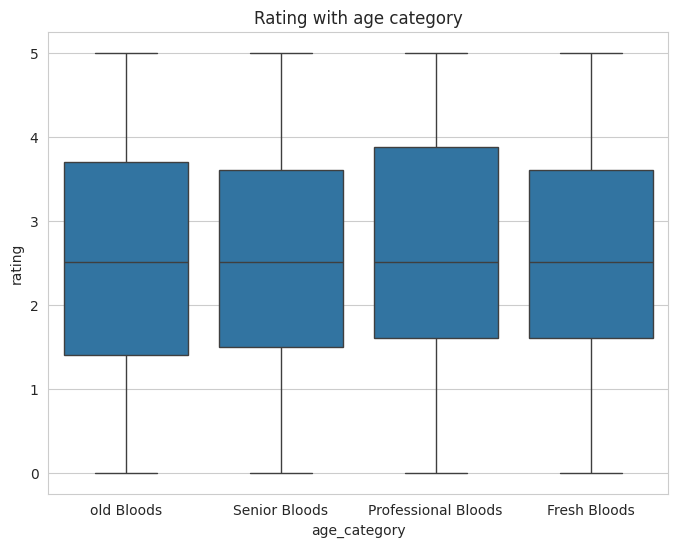

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="age_category", y="rating", data=df)
plt.title("Rating with age category")

# Show plot
plt.show()

BoxPlot:
This chart identifies which age demographics correspond to the highest-rated freelancers. Clients can utilize this information to discern which age group is most consistently satisfying customer expectations and demonstrating superior performance on projects. This data can inform hiring decisions by highlighting age categories that tend to perform well.

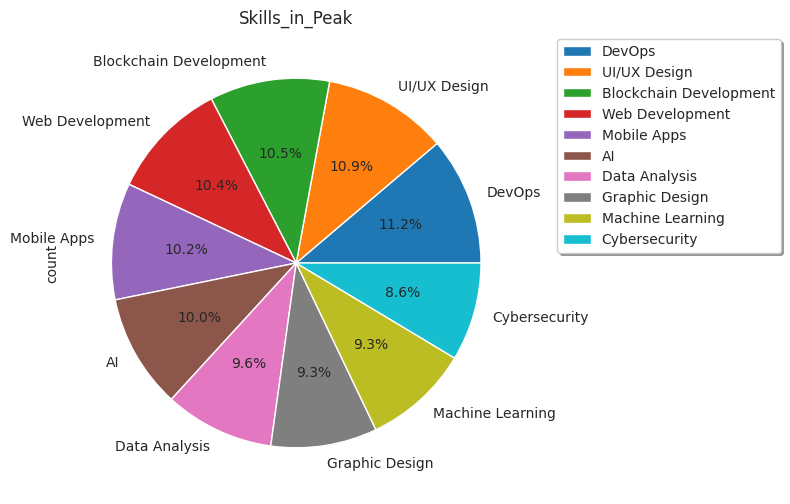

In [61]:
plt.figure(figsize=(12,6))
df['primary_skill'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Skills_in_Peak")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1),
           fancybox=True, shadow=True, ncol=1)
plt.show()

Pie Chart:
This chart identifies the peak skills and the specific domains where we have the highest availability of experienced freelancers. Clients can use this data to quickly assess our service capacity and coverage across various professional fields.

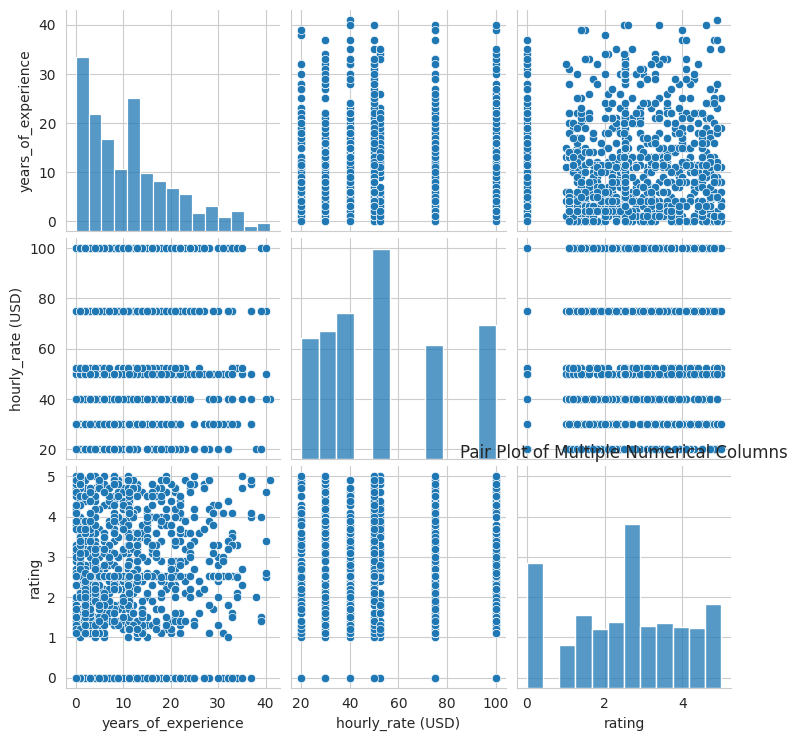

In [62]:
sns.pairplot(df[['years_of_experience', 'hourly_rate (USD)', 'rating']])
plt.title('Pair Plot of Multiple Numerical Columns')
plt.show()

Interpretation of Distributions (Diagonal Plots)
Years of Experience:
The histogram shows a right-skewed distribution, indicating that most individuals have fewer years of experience (concentrated in the 0-10 year range), with fewer individuals having extensive experience (20+ years).
Hourly Rate (USD): The distribution appears relatively uniform or slightly bimodal, with a noticeable concentration of individuals in the approximately \$40-\$80 per hour range.
Rating: The ratings are primarily concentrated around 3 and 4, with fewer individuals receiving ratings of 0, 1, 2, or 5.

Interpretation of Relationships (Scatter Plots)
Years of Experience vs. Hourly Rate (USD):
There appears to be a positive correlation between years of experience and hourly rate. As years of experience increase, the range of hourly rates tends to shift upwards, suggesting that more experienced individuals generally command higher rates.
Years of Experience vs. Rating: The relationship is less clear, but there seems to be a slight positive trend. While many experienced individuals have ratings around 3-4, there are also numerous lower ratings across all experience levels, indicating that experience alone does not guarantee a high rating.
Hourly Rate (USD) vs. Rating: Similar to the previous relationship, there is no strong, clear correlation. High hourly rates are associated with a range of ratings, and lower rates also have varying ratings.
Overall, the pair plot helps to quickly observe potential correlations and data distributions, revealing that while experience might influence hourly rates, other factors likely contribute to the 'rating' variable.

In [63]:
print (df)

    freelancer_ID             name   gender  age    country  language  \
0        FL250001  Ms. Nicole Kidd  Unknown   52      Italy   Italian   
1        FL250002   Vanessa Garcia   Female   52  Australia   English   
2        FL250003      Juan Nelson     Male   53    Germany    German   
3        FL250004   Amanda Spencer   Female   38  Australia   English   
4        FL250005  Lynn Curtis DDS   Female   53    Germany    German   
..            ...              ...      ...  ...        ...       ...   
995      FL250996    Albert Wilcox  Unknown   56     Turkey   Turkish   
996      FL250997    Cheryl Norris  Unknown   26    Germany    German   
997      FL250998    Kathy Watkins   Female   37      Japan  Japanese   
998      FL250999      John Obrien  Unknown   46     Russia   Russian   
999      FL251000       Dawn Green  Unknown   36     Mexico   Spanish   

              primary_skill  years_of_experience  hourly_rate (USD)   rating  \
0    Blockchain Development                

## Stage 4 – Documentation, Insights and Presentation

Show a dashboard aligning all the charts in powerbi by connecting python in PowerBI

Summarize findings in plain English (what do the patterns mean)

Highlight 3–5 key insights (trends, anomalies, correlations)

Provide recommendations for business or decision-making

Explain the FINAL STORY WITH THE DASHBOARD

Create a PDF pasting your DASHBOARD, explaining all the above mentioned concepts and submit it


In [64]:
df.to_csv('DA_FINAL_PROJECT_DIVYADHARSAN.csv', index=False)
from google.colab import files
files.download('DA_FINAL_PROJECT_DIVYADHARSAN.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
# your stage 4 pdf Link

'''
step1 --> Create a docs that should have all the above mentioned
step2 --> Save it as "Stage4_doc"
Step3 --> Download it as PDF
step4 --> Upload the pdf in your drive
step5 --> Right click on your pdf in drive
step6 --> click share and change access into anyone with the link (Viewer)
step7 --> click copy link and paste it here...
You are done.
'''

'\nstep1 --> Create a docs that should have all the above mentioned\nstep2 --> Save it as "Stage4_doc"\nStep3 --> Download it as PDF\nstep4 --> Upload the pdf in your drive\nstep5 --> Right click on your pdf in drive\nstep6 --> click share and change access into anyone with the link (Viewer)\nstep7 --> click copy link and paste it here...\nYou are done.\n'

[link text](https:// https://docs.google.com/document/d/1KgmvYsTntepnu0Ccms-gwOOvSQ2WTGjp/edit)

# Future Enhancement

Use a larger or more recent dataset for deeper insights

Automate parts of the analysis with scripts or dashboards

Add advanced visualizations and interactive dashboards in Power BI or Tableau

Extend the analysis to predictive modeling for forecasting if needed

# Conclusion

From the analysis, we identified meaningful relationships and patterns in the dataset. The visualizations and insights highlight the main factors influencing the outcomes and provide a strong foundation for business decisions.